### Communication

In [20]:
from ipaddress import IPv4Address 
from pyairmore.request import AirmoreSession  
from pyairmore.services.messaging import MessagingService  
c = "192.168.0.108" 
ip = IPv4Address(c) 
s = AirmoreSession(ip)
print("Running:", s.is_server_running)
wa = s.request_authorization()
print("Authorization:",wa)
service = MessagingService(s) 

Running: True
Authorization: True


### Importing Libraries

In [21]:
import numpy
import numpy as npy 
import matplotlib.pyplot as plt
import os
import time
import cv2
import tensorflow as tf
import random

import PIL
from IPython.display import display
from PIL import Image

### Confirmation

In [22]:
model = tf.keras.models.load_model('Dataset/Allen3.h5')
def prepare(filepath,j):
    y2=0
    global ld
    global model
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    x=model.predict(new_array.reshape(-1,IMG_SIZE, IMG_SIZE, 3))
    if x == 1:
        ct=time.time()
        if (ct-ld)>0.5:               
        # plt.imshow(img_array, cmap='gray')
        # plt.show()                              --- Matplotlib altering colours. Why ?
            cv2.imwrite("test/final/f{}.jpg".format(j),img_array)
            ld=ct
            y2=1
    return y2

### YOLO

In [3]:
def main1(n1,j): 
    y1 = 0
    y1b = 0
    n = n1 
    global ld # Global variable for showing last detected time
    
    # load the COCO class labels our YOLO model was trained on - *preset
    lpath = os.path.sep.join(['yolo-coco', "coco.names"])
    la = open(lpath).read().strip().split("\n")
    # derive the paths to the YOLO weights and model configuration - *preset
    weightsPath = os.path.sep.join(['yolo-coco', "yolov3.weights"])
    configPath = os.path.sep.join(['yolo-coco', "yolov3.cfg"])
    # load our YOLO object detector trained on COCO dataset (80 classes) - *preset
    net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
    
    # load input to get its dimensions
    im = cv2.imread(n)
    (H, W) = im.shape[:2]

    # Colour for the labels
    npy.random.seed(42)
    colours = npy.random.randint(0, 255, size=(len(la), 3),dtype="uint8")

    # Naming layers - *preset
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    # construct a blob from the input image and then perform a forward - *preset
    # pass of the YOLO object detector, giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(im, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    out = net.forward(ln)
    end = time.time()

    box1 = []
    classID1 = []
    confidence1 = []
    
    for o in out:
        for det in o:
            s1 = det[5:]
            classID = npy.argmax(s1)
            confidence = s1[classID]
            if confidence > 0.5:
                box = det[0:4] * npy.array([W, H, W, H])
                (cX, cY, w1, h1) = box.astype("int")
                x = int(cX - (w1 / 2))
                y = int(cY - (h1 / 2))
                box1.append([x, y, int(w1), int(h1)])
                confidence1.append(float(confidence))
                classID1.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding - *preset
    id1 = cv2.dnn.NMSBoxes(box1, confidence1, 0.5, 0.3)
    
    if len(id1) > 0:
        for i in id1.flatten():
            temp = []
            (x, y) = (box1[i][0], box1[i][1])
            (w, h) = (box1[i][2], box1[i][3])
            cl = [int(c) for c in colours[classID1[i]]]
            text = "{}".format(la[classID1[i]])
            if text == "truck":
                area=w*h
                cv2.rectangle(im, (x-2, y-2), (x + w + 2, y + h + 2), cl, 2)
                cv2.putText(im, str(i)+", "+str(x)+" "+(str(y)), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, cl, 2)
                cv2.imwrite("test/detected/d{}.jpg".format(j),im)
                if area>100:
                    im_refined = cv2.imread("test/detected/d{}.jpg".format(j))
                    crop = im_refined[int(y):int(y+h),int(x):int(x+w)]
                    cv2.imwrite("test/crops/c{}_{}.jpg".format(j,i),crop)
                    y1b = prepare("test/crops/c{}_{}.jpg".format(j,i),j)
                    if y1b==1:
                        y1=1
    return y1

### Main module

In [16]:
def call(given):
    y0=0
    yes=0
    vid1 = "Demo/Geo/demo ({}).mp4".format(given)
    frames = 60
    # cv2.VideoCapture(0) - If you want webcam
    cap = cv2.VideoCapture(vid1)
    i,j,ld = 0,0,0

    while True:
        r, f = cap.read() 
        if r: 
            cv2.imshow('Test Video', f)   
            f = cv2.resize(f,(400,300))
            if i%frames == 0:
                try: 
                    j = j+1
                    s = "test/overall/ss{}.jpg".format(j)
                    cv2.imwrite(s,f)
                    y0 = main1(s,j)
                    if y0==1:
                        yes=1
                except:
                    pass
            i=i+1
            if cv2.waitKey(1) & 0xFF == ord('q'): 
            # Press Q to quit
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
    return yes

### Plotting

In [27]:
def person(points1,p1,p2):
    initial1 = p1
    initial2 = p2
    if (p1,p2) in [(1,5),(5,5),(5,1),(1,1)]:
        l = [1,4,6]
        random.shuffle(l)
        for i in range(3):
            c = call(l[i])
            if c==1:
                if i==0:
                    if p1==1:
                        p1+=1
                    else:
                        p1-=1
                if i==1:
                    if p1==1:
                        p1+=1
                        if p2==1:
                            p2-=1
                        else:
                            p2+=1
                    else:
                        p1-=1
                        if p2==1:
                            p2-=1
                        else:
                            p2+=1
                if i==2:
                    if p2==5:
                        p2-=1
                    else:
                        p2+=1
                break
    else:
        l = [1,2,3,4,5,6,7,8]
        random.shuffle(l)
        for i in range(8):
            c = call(l[i])
            if c==1:
                if i==0:
                    p2=p2+1
                if i==1:
                    p1+=1
                    p2+=1
                if i==2:
                    p1+=1
                if i==3:
                    p1+=1
                    p2-=1
                if i==4:
                    p2-=1
                if i==5:
                    p1-=1
                    p2-=1
                if i==6:
                    p1-=1
                if i==7:
                    p2+=1
                    p1-=1
                break
    if (p1,p2) in points1:
        return person(points1,initial1,initial2)
    elif p1 not in range(1,6) or p2 not in range(1,6):
        return person(points1, initial1, initial2)
    else:
        points1.append((p1,p2))
        print(points1)
        message = "Ambulance found at "+str(p1)+","+str(p2)
        # service.send_message("9591136337", message) 
        print(message)
        return points1

### Display

[(1, 5), (1, 4)]
Ambulance found at 1,4


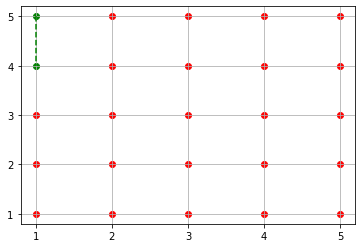

[(1, 5), (1, 4), (1, 3)]
Ambulance found at 1,3


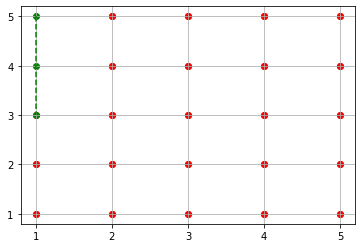

[(1, 5), (1, 4), (1, 3), (1, 2)]
Ambulance found at 1,2


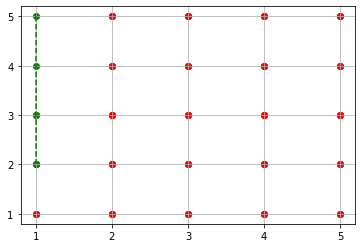

[(1, 5), (1, 4), (1, 3), (1, 2), (2, 2)]
Ambulance found at 2,2


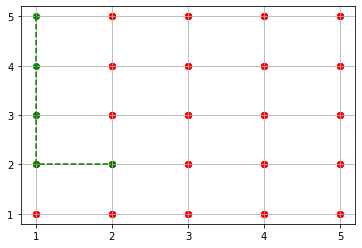

[(1, 5), (1, 4), (1, 3), (1, 2), (2, 2), (3, 1)]
Ambulance found at 3,1


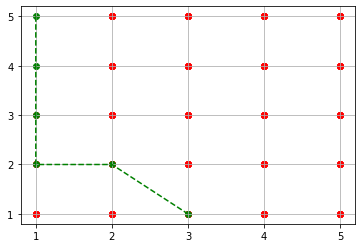

In [28]:
points = []
points1 = [(1,5)]
for i in range(5):
    points1 = person(points1,points1[-1][0],points1[-1][1])
    for k in range(1,6):
            for l in range(1,6):
                if (k,l) not in points1:
                    points.append((k,l))
    x = list(map(lambda x: x[0], points))
    y = list(map(lambda x: x[1], points))

    x1 = list(map(lambda x1: x1[0], points1))
    y1 = list(map(lambda x1: x1[1], points1))

    plt.xticks(npy.arange(1, 6, 1))
    plt.yticks(npy.arange(1, 6, 1))
    plt.scatter(x,y,c="r")
    plt.scatter(x1,y1,c="g")
    plt.grid(True)
    plt.plot(x1,y1,'g--');
    plt.show()